In [39]:
import numpy as np
from scipy.stats import uniform, norm
from scipy.optimize import minimize
import matplotlib.pyplot as plot

### Генерация выборки

In [49]:
size = 500
x = uniform.rvs(0, 1, size=size)
epsilons = norm.rvs(0, 0.2, size=size)
y = 0.5 * x + 1 + epsilons
X = x.reshape((size, 1))

### Визуализация выборки

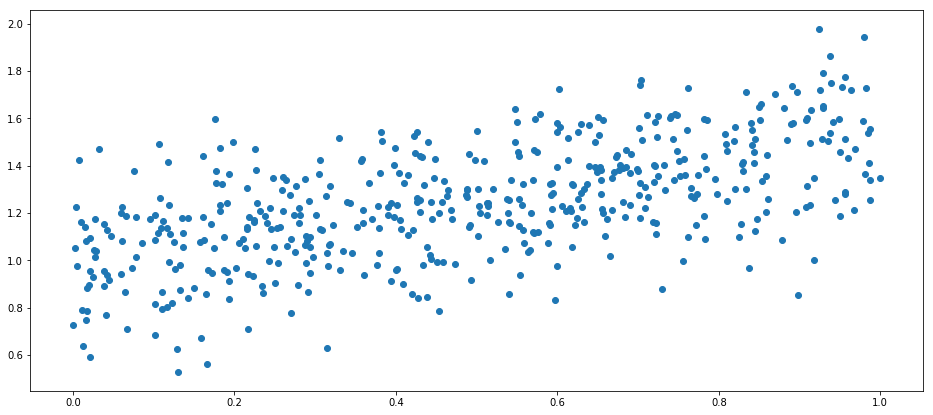

In [58]:
plot.figure(figsize=(16, 7))
plot.scatter(x, y)
plot.show()

### Восстановление зависимости путем минимизации MSE

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
def MSE(x, y, k):
    y_pred = k[0]*x + k[1]
    return mean_squared_error(y, y_pred)

def MAE(x, y, k):
    y_pred = k[0]*x + k[1]
    return mean_absolute_error(y, y_pred)

resultMSE = minimize(lambda k: MSE(x, y, k), [1, 1])
print "a, b =", resultMSE.x
a, b = resultMSE.x

a, b = [ 0.52718052  0.98592053]


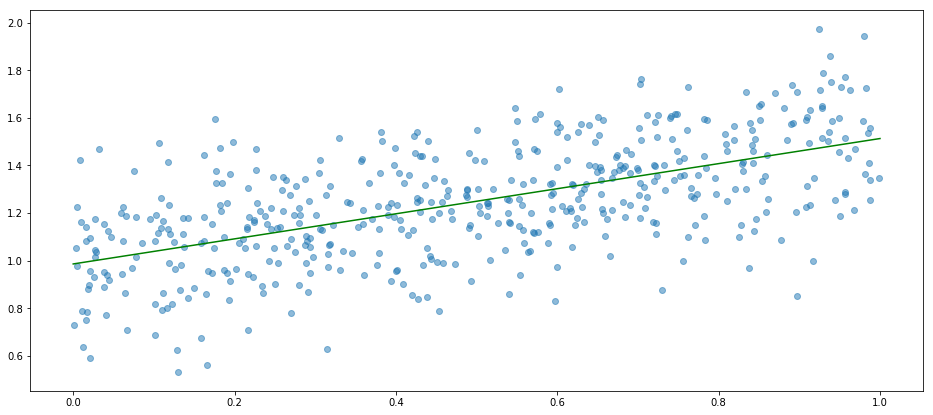

In [78]:
grid = np.linspace(0, 1, 100)
values = [a*v + b for v in grid]
plot.figure(figsize=(16, 7))
plot.plot(grid, values, color='green')
plot.scatter(x, y, alpha=0.5)
plot.show()

### Генерация расширенной выборки с выбросами

In [79]:
extra_size = 75
extra_x = uniform.rvs(0, 1, size=extra_size)
extra_epsilons = norm.rvs(0, 0.2, size=extra_size)
extra_y = 0.5 * extra_x - 1 + extra_epsilons
extra_X = extra_x.reshape((extra_size, 1))
extended_x = np.concatenate((x, extra_x), axis=0)
extended_X = np.concatenate((X, extra_X), axis=0)
extended_y = np.concatenate((y, extra_y), axis=0)

In [83]:
# минимизация MAE и MSE
a_MSE, b_MSE = (minimize(lambda k: MSE(extended_x, extended_y, k), [1, 1])).x
a_MAE, b_MAE = (minimize(lambda k: MAE(extended_x, extended_y, k), [1, 1])).x

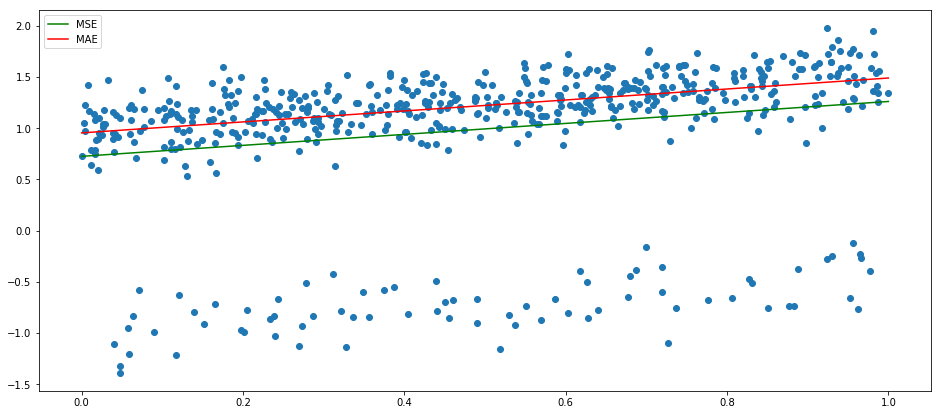

In [85]:
# визуализация
grid = np.linspace(0, 1, 100)
valuesMSE = [a_MSE*v + b_MSE for v in grid]
valuesMAE = [a_MAE*v + b_MAE for v in grid]

plot.figure(figsize=(16, 7))
plot.plot(grid, valuesMSE, color='green', label='MSE')
plot.plot(grid, valuesMAE, color='red', label='MAE')

plot.scatter(extended_x, extended_y)
plot.legend()
plot.show()

### Выводы
Как видно из полученных графиков, метрика MAE более устойчива к выбросам, чем метрика MSE. Это неудивительно, поскольку в метрике MSE в общую сумму каждое отклонение входит во 2 степени, соответсвенно выбросы значительно влияют на сумму.